In [18]:
!pwd

/Users/macbook/divtel/SST


In [19]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import sys
from ipywidgets import interactive, FloatSlider, interact, fixed
from divtel import *
import copy
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_sky
from astroplan import FixedTarget
#from . import utils
#from .const import COLORS
#from . import pointing

from matplotlib.transforms import Affine2D
from astropy.visualization.wcsaxes import SphericalCircle

import healpy as hp
import tqdm

#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## LOAD CTA CONFIG

In [20]:
cta = CTA_Info('south')

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2025-02-21T13:35:12.413


In [21]:
# Note that if the radius is in meters, 
# you can set LoadConfig(file, radius="meters")
# defalut is in degrees

array = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt", frame=cta)


## Check configuration table

In [22]:
array.table.units = "deg"
array.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


In [23]:
table=array.table

## Check the telescope spatial distribution
This is useful to pick the groups

In [24]:
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


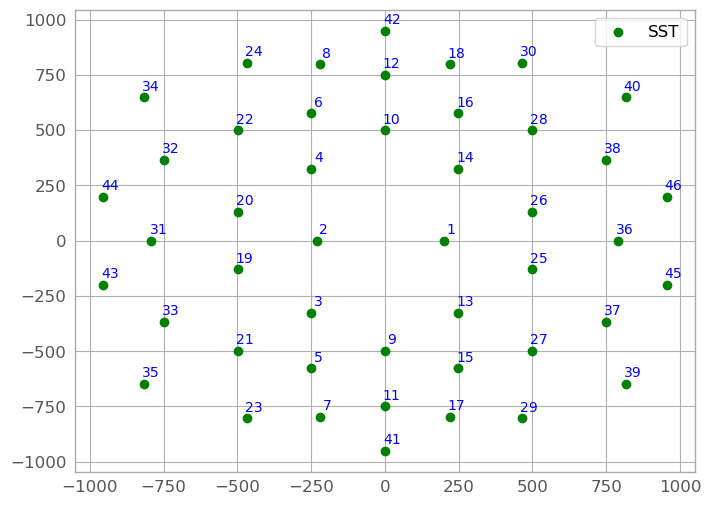

In [25]:
# Loop through all the telescopes
#for fov in array.table["fov"]:
#    print(fov)
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
for i in range(len(array.table)):
    plt.scatter(array.table['x'][i], array.table['y'][i], c=colors[i], label=fov_labels[colors[i]])

    # Annotate each point with the telescope ID
    #matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)
#Annotate the point xy with text text.
#In the simplest form, the text is placed at xy.
    plt.annotate(str(array.table["id"][i]),
                 (array.table['x'][i], array.table['y'][i]),  # Point position
                 textcoords="offset points",  # Text position relative to the point
                 xytext=(5, 5),  # Offset in pixels (to avoid overlapping the point)
                 ha='center', fontsize=10, color='blue')
handles, labels = plt.gca().get_legend_handles_labels()
#handles, labels like this is doing
    #plt.gca() gets the current Axes object, which is where your plot is
    #.get_legend_handles_labels()
        #handles: Returns a list of the graphical elements (e.g., lines, scatter plot points) that would appear in the legend.
        # labels: Returns the text labels associated with each graphical element in handles

by_label = dict(zip(labels, handles))  # Remove duplicate labels, the dictionary by the structure takes out the double 
plt.legend(by_label.values(), by_label.keys())
#by_label.values This is pulling out the unique graphical elements
# by_label.keys  This is retrieving the unique text 
plt.savefig("./different_telescopes.png", dpi=300, bbox_inches="tight")
plt.show() 

## Check the hyper field of view (hFoV)

This is the whole telescope array hFoV maybe? (ask)

In [26]:
array.hFoV(m_cut=3) 

46it [00:06,  7.20it/s]


(62.238869377690584, 46.0)

In [27]:
#array.hFoV(m_cut=3)

## Grouping telescopes

In [28]:


sub_group_div = {'1':[24,12,30,42,8,18], 
             '2':[44,32,34],
              '3':[43,33,35],
              '4':[23,41,29,11,7,17],
              '5':[37,39,45],
              '6':[38,40,46],
              '7':[1,2,9,10],
              '8':[16,26,28],
              '9':[15,25,27],
              '10':[13,14,36],
              '11':[5,19,21],
              '12':[6,20,22],
              '13':[3,4,31]
            
    
}


In [29]:
def compute_center_of_gravity(group):
    x, y, z = group['x'], group['y'], group['z']
    cog_x = round(np.mean(x),2)
    cog_y = round(np.mean(y),2)
    cog_z = round(np.mean(z),2)
    return cog_x, cog_y, cog_z

# Function to create new telescope list with center of gravity
def create_new_group_list(tel_group):
    new_telescopes = []
    for group in tel_group.groups:
        print(tel_group.groups)
        print (group['focal'][0],round(group['radius'][0],2))
        #id_ = group["id"][0]
        cog = compute_center_of_gravity(group)
        focal, fov = group['focal'][0], round(group['radius'][0],2)  # Assuming same within a group
        new_telescopes.append([*cog, focal, fov])
    return new_telescopes


In [30]:
tel_group, labels, number_of_telescopes_subarray_1 =array.group_by(sub_group_div)

In [31]:
# Step 2: Create new telescope list with center of gravity
new_telescopes = create_new_group_list(tel_group)



<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45


In [32]:
# Define the file path where you want to save the output
output_file_path = './SST_best_config_div_conv_together.txt'

# Open the file in write mode
with open(output_file_path, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path}")


New telescope data has been written to ./SST_best_config_div_conv_together.txt


## MULTIPLE DIVERGENCES

SST configuration with two subarrays

In [33]:
array_SST_2_diff_div= LoadConfig('./SST_best_config_div_conv_together.txt', frame=cta, pointing2src=True)

In [34]:
array_SST_2_diff_div.table.units = "deg"
array_SST_2_diff_div.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,816.85
2,-840.0,404.67,16.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,931.85
3,-840.0,-404.67,55.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.21
4,0.0,-816.83,65.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,817.70
5,839.67,-404.67,17.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.76
6,839.67,404.67,10.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.87
7,-7.75,0.0,22.5,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,8.77
8,415.67,402.0,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,578.95


## Here I am trying to find the multiplicity for each subarray division 

In [49]:
 number_of_telescopes_subarray_1

[6, 3, 3, 6, 3, 3, 4, 3, 3, 3, 3, 3, 3]

In [64]:
table_SST_conv = []
table_SST= array_SST_2_diff_div.table
number_of_telescopes_config_SST_conv=[]
# Append the columns for LST so I know what to get or expect
table_SST_conv.append(table_SST['x'])
table_SST_conv.append(table_SST['y'])
table_SST_conv.append(table_SST['z'])
table_SST_conv.append(table_SST['focal'])
table_SST_conv.append(table_SST['radius'])
table_SST_conv.append(table_SST['fov'])

# Initialize sub_config and other variables
sub_config = []
telescopes = [1, 2,3,4,5,6]  # Telescope indices
# Loop through the telescopes so I can write them in a file
for tel in telescopes:
    # Putting it tel-1 because the first column we had the index
    sub_config.append([col[tel - 1] for col in table_SST_conv])
    number_of_telescopes_config_SST_conv.append(number_of_telescopes_subarray_1[tel-1])


# Print the result for verification
print(sub_config)
print(number_of_telescopes_config_SST_conv)

[[0.0, 816.83, 21.83, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, 404.67, 16.75, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, -404.67, 55.92, 5.6, 4.450000000000001, 62.46242685852285], [0.0, -816.83, 65.42, 5.6, 4.450000000000001, 62.46242685852285], [839.67, -404.67, 17.75, 5.6, 4.450000000000001, 62.46242685852285], [839.67, 404.67, 10.08, 5.6, 4.450000000000001, 62.46242685852285]]
[6, 3, 3, 6, 3, 3]


In [65]:
table_SST_div = []
table_SST= array_SST_2_diff_div.table
number_of_telescopes_config_SST_div=[]
# Append the columns for LST so I know what to get or expect
table_SST_div.append(table_SST['x'])
table_SST_div.append(table_SST['y'])
table_SST_div.append(table_SST['z'])
table_SST_div.append(table_SST['focal'])
table_SST_div.append(table_SST['radius'])
table_SST_div.append(table_SST['fov'])

# Initialize sub_config and other variables
sub_config_div= []
telescopes = [7,8,9,10,11,12,13]  # Telescope indices
# Loop through the telescopes so I can write them in a file
for tel in telescopes:
    # Adjust for 1-based indexing in telescopes to 0-based indexing in Python
    sub_config_div.append([col[tel - 1] for col in table_SST_div])
    number_of_telescopes_config_SST_div.append( number_of_telescopes_subarray_1[tel-1])


# Print the result for verification
print(sub_config_div)
print(number_of_telescopes_config_SST_div)

[[-7.75, 0.0, 22.5, 5.6, 4.450000000000001, 62.46242685852285], [415.67, 402.0, 12.42, 5.6, 4.450000000000001, 62.46242685852285], [415.67, -402.0, 27.92, 5.6, 4.450000000000001, 62.46242685852285], [429.33, 0.0, 16.08, 5.6, 4.450000000000001, 62.46242685852285], [-415.67, -402.0, 48.25, 5.6, 4.450000000000001, 62.46242685852285], [-415.67, 402.0, 15.58, 5.6, 4.450000000000001, 62.46242685852285], [-429.67, 0.0, 29.42, 5.6, 4.450000000000001, 62.46242685852285]]
[4, 3, 3, 3, 3, 3, 3]


In [66]:
print(sub_config)

[[0.0, 816.83, 21.83, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, 404.67, 16.75, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, -404.67, 55.92, 5.6, 4.450000000000001, 62.46242685852285], [0.0, -816.83, 65.42, 5.6, 4.450000000000001, 62.46242685852285], [839.67, -404.67, 17.75, 5.6, 4.450000000000001, 62.46242685852285], [839.67, 404.67, 10.08, 5.6, 4.450000000000001, 62.46242685852285]]


In [67]:
# Define the file path where you want to save the output
output_file_path_3 = './best_config_SST_conv.txt'

# Open the file in write mode
with open(output_file_path_3, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_3}")
# Define the file path where you want to save the output


New telescope data has been written to ./best_config_SST_conv.txt


In [68]:
output_file_path_4 = './best_config_SST_div.txt'

# Open the file in write mode
with open(output_file_path_4, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config_div:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_4}")

New telescope data has been written to ./best_config_SST_div.txt


In [69]:
full_array = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt", frame=cta)
array_conv = LoadConfig("/Users/macbook/divtel/SST/best_config_SST_conv.txt", frame=cta)
array_div = LoadConfig("/Users/macbook/divtel/SST/best_config_SST_div.txt", frame=cta)

In [70]:
array_div.table.units='deg'
array_div.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-7.75,0.0,22.5,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,6.92
2,415.67,402.0,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,579.22
3,415.67,-402.0,27.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,579.10
4,429.33,0.0,16.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,430.57
5,-415.67,-402.0,48.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,577.91
6,-415.67,402.0,15.58,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,577.50
7,-429.67,0.0,29.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,428.54


In [71]:
array_conv.table.units='deg'
array_conv.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,816.88
2,-840.0,404.67,16.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.41
3,-840.0,-404.67,55.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.62
4,0.0,-816.83,65.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,817.54
5,839.67,-404.67,17.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.29
6,839.67,404.67,10.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.44


In [72]:
full_array.table.units='deg'
full_array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


the barycenter for the calculations[-0.73913043  0.         29.65217391]
the barycenter for the calculations of the second divergence[-0.73913043  0.         29.65217391]


6it [00:00,  7.31it/s]
7it [00:00,  7.28it/s]
6it [00:00,  6.93it/s]


13.06239815442191


7it [00:00,  7.35it/s]


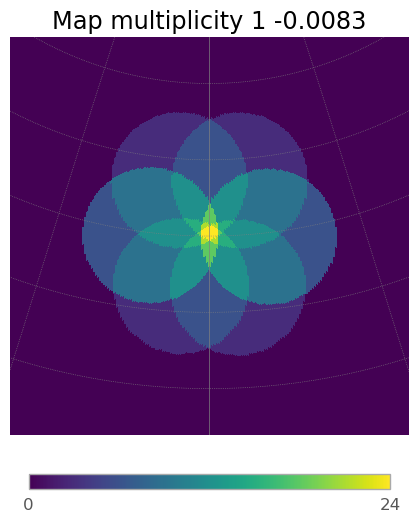

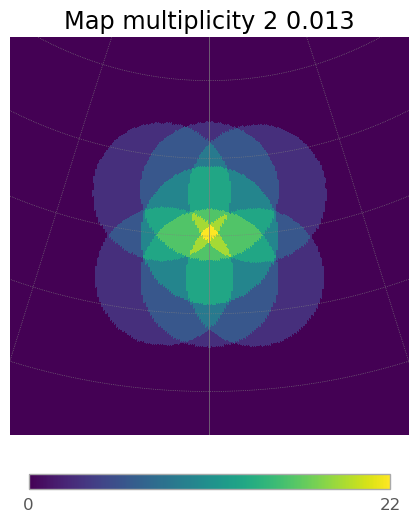

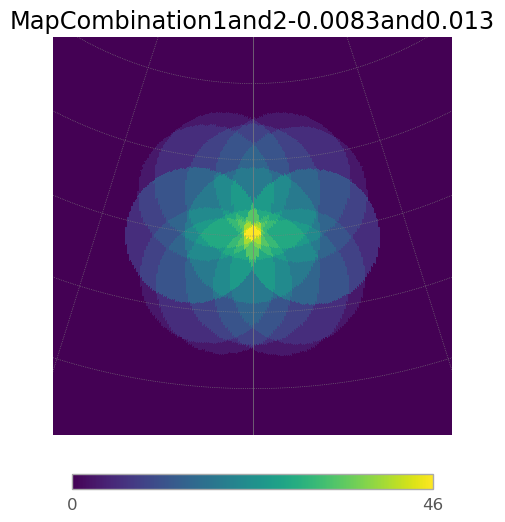

In [93]:
array_conv.divergent_pointing_2_div(complete_array=full_array,tel_group_2=array_div, div1=-0.0083, div2=0.013, az=0, alt=60)
array_conv.multiplicity_plot_2_div(array_div, subarray_mult_1=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)



46it [00:06,  7.34it/s]
46it [00:06,  7.35it/s]


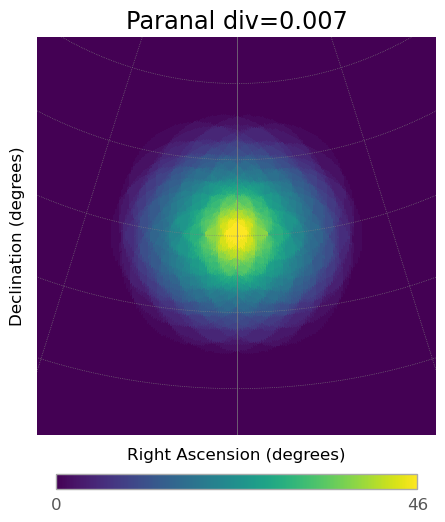

In [80]:
full_array.divergent_pointing(div=0.007, az=0, alt=60)
full_array.multiplicity_plot()

In [ ]:
## IN THE MULTIPLICITY PLOTS!!!! THERE IS A PROBLEM WITH THE POINTING THE PI!!!1

In [81]:
full_array.hFoV()

46it [00:06,  7.36it/s]


(204.17129316082276, 14.01226796839874)

In [94]:
array_conv.hFoV_for_2_arrays(array_2=array_div, subarray_mult=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)

6it [00:00,  6.95it/s]
7it [00:01,  6.76it/s]


(213.18058588363635, 13.416707677165354)

In [95]:
## here we can play around a bit with the same number as before only that we stop at 0.013
#The idea could be to do an if lets see if I am able to do it 

# CHOOSING THE DIFFERENT CONVERGENCES
## DIV lets try 0.0022, 0.0043, 0.008, 0.01135, 0.013

7it [00:00,  7.36it/s]
7it [00:00,  7.11it/s]


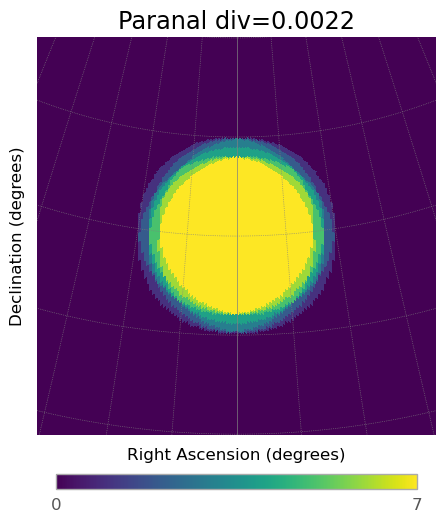

In [101]:
array_div.divergent_pointing(div=0.0022, az=0, alt=60)
array_div.multiplicity_plot()

In [105]:
array_div.hFoV(subarray_mult=number_of_telescopes_config_SST_div)

7it [00:00,  7.18it/s]


(80.33613860255637, 17.021384263793667)

In [116]:
hFoV_to_stop=array_div.hFoV(subarray_mult=number_of_telescopes_config_SST_div,m_cut=21)[0]

7it [00:01,  6.90it/s]


In [117]:
hFoV_to_stop

45.977555001724234

In [121]:
conv=np.linspace(-0.0035,-0.0011, 20)
for convergence in conv:
    array_conv.divergent_pointing(div=convergence, az=0, alt=60)
    hFoV_conv=array_conv.hFoV(subarray_mult=number_of_telescopes_config_SST_conv,m_cut=23)[0]
    print(array_conv.hFoV(subarray_mult=number_of_telescopes_config_SST_conv,m_cut=23)[0])
    if hFoV_conv > hFoV_to_stop:
        convergence_to_stop=convergence
        print(f"stop, the {convergence}")
        break 

-6.226068608767667 rad
-6.2564375606284095 rad
-0.026747746551176732 rad
-0.057116698411919575 rad
-0.030087200256950553 rad
-6.253098106922636 rad


6it [00:00,  7.00it/s]
6it [00:00,  7.38it/s]


25.13946746671573
-6.228125761186492 rad
-6.2573507176332335 rad
-0.025834589546352316 rad
-0.05505954599309382 rad
-0.028936764342142318 rad
-6.254248542837444 rad


6it [00:00,  7.17it/s]
6it [00:00,  7.44it/s]


26.33283811850036
-6.230183376417663 rad
-6.258267591556827 rad
-0.024917715622760017 rad
-0.05300193076192361 rad
-0.02779141688155784 rad
-6.255393890298029 rad


6it [00:00,  7.38it/s]
6it [00:00,  7.32it/s]


27.355727248601468
-6.232241437287188 rad
-6.2591882036326645 rad
-0.023997103546922194 rad
-0.05094386989239874 rad
-0.026651127120515206 rad
-6.256534180059071 rad


6it [00:00,  7.38it/s]
6it [00:00,  7.22it/s]


28.50975601076682
-6.234299926598579 rad
-6.26011257524273 rad
-0.023072731936855995 rad
-0.048885380581006554 rad
-0.02551586452322052 rad
-6.257669442656366 rad


6it [00:00,  7.29it/s]
6it [00:00,  7.36it/s]


29.598214956900055
-6.236358827133708 rad
-6.261040727918664 rad
-0.022144579260921837 rad
-0.04682648004587753 rad
-0.024385598771175854 rad
-6.258799708408411 rad


6it [00:00,  6.34it/s]
6it [00:00,  7.30it/s]


30.581762197381888
-6.238418121653659 rad
-6.2619726833429175 rad
-0.021212623836668776 rad
-0.04476718552592773 rad
-0.02326029976159738 rad
-6.259925007417989 rad


6it [00:00,  7.18it/s]
6it [00:00,  7.30it/s]


31.919386444437187
-6.240477792899586 rad
-6.262908463349918 rad
-0.020276843829668323 rad
-0.042707514280000414 rad
-0.022139937605840654 rad
-6.261045369573745 rad


6it [00:00,  7.37it/s]
6it [00:00,  7.22it/s]


33.08652916980896
-6.242537823593583 rad
-6.263848089927247 rad
-0.01933721725233939 rad
-0.040647483586002675 rad
-0.021024482627832963 rad
-6.262160824551753 rad


6it [00:00,  7.29it/s]
6it [00:00,  7.32it/s]


34.437267380070686
-6.244598196439544 rad
-6.264791585216818 rad
-0.018393721962768783 rad
-0.038587110740042174 rad
-0.019913905362514583 rad
-6.263271401817072 rad


6it [00:00,  7.31it/s]
6it [00:00,  7.14it/s]


35.55195425261677
-6.246658894124027 rad
-6.265738971516071 rad
-0.017446335663515278 rad
-0.036526413055558926 rad
-0.01880817655429201 rad
-6.264377130625294 rad


6it [00:00,  7.19it/s]
6it [00:00,  7.16it/s]


36.81089472043352
-6.24871989931713 rad
-6.266690271279171 rad
-0.01649503590041501 rad
-0.034465407862456665 rad
-0.017707267155494755 rad
-6.2654780400240915 rad


6it [00:00,  7.14it/s]
6it [00:00,  7.10it/s]


38.09606311466312
-6.250781194673355 rad
-6.2676455071182176 rad
-0.015539800061368236 rad
-0.03240411250623154 rad
-0.016611148324843228 rad
-6.266574158854743 rad


6it [00:00,  7.37it/s]
6it [00:00,  7.36it/s]


39.25009187682847
-6.252842762832485 rad
-6.2686047018044615 rad
-0.014580605375124733 rad
-0.03034254434710082 rad
-0.015519791425925966 rad
-6.26766551575366 rad


6it [00:00,  7.22it/s]
6it [00:00,  7.24it/s]


40.758197645567286
-6.254904586420461 rad
-6.2695678782695285 rad
-0.013617428910057683 rad
-0.02828072075912491 rad
-0.014433168025683507 rad
-6.268752139153903 rad


6it [00:00,  7.38it/s]
6it [00:00,  7.30it/s]


41.93845433414549
-6.256966648050254 rad
-6.27053505960666 rad
-0.012650247572925988 rad
-0.026218659129332522 rad
-0.013351249892903816 rad
-6.269834057286682 rad


6it [00:00,  7.20it/s]
6it [00:00,  7.38it/s]


43.36787632364576
-6.259028930322744 rad
-6.271506269071953 rad
-0.011679038107633932 rad
-0.0241563768568418 rad
-0.012274008996722152 rad
-6.270911298182864 rad


6it [00:00,  6.94it/s]
6it [00:00,  7.32it/s]


44.69238660749463
-6.261091415827606 rad
-6.272481530085609 rad
-0.010703777093977074 rad
-0.022093891351981032 rad
-0.011201417505135591 rad
-6.27198388967445 rad


6it [00:00,  7.05it/s]
6it [00:00,  7.43it/s]

46.134922560201325
stop, the -0.0013526315789473679


In [123]:
convergence_to_stop

-0.0013526315789473679

In [154]:
conv=np.linspace(-0.0083,-0.0012, 100)
convergence_list=[]
divergence_list=[0.0022, 0.0043, 0.008, 0.01135, 0.013]
for divergence in divergence_list:
    for convergence in conv:
        array_div.divergent_pointing(div=divergence, az=0, alt=60)
        hFoV_to_stop=array_div.hFoV(subarray_mult=number_of_telescopes_config_SST_div,m_cut=21)[0]
        array_conv.divergent_pointing(div=convergence, az=0, alt=60)
        hFoV_conv=array_conv.hFoV(subarray_mult=number_of_telescopes_config_SST_conv,m_cut=23)[0]
        if hFoV_conv > hFoV_to_stop:
            convergence=round(convergence,5)
            convergence_list.append(convergence)
            print(f"stop, the {convergence}")
            break 

7it [00:00,  7.09it/s]


-6.148406455252941 rad
-6.224296157423696 rad
-0.05888914975588966 rad
-0.13477885192664507 rad
-0.07790173269392353 rad
-6.205283574485662 rad


6it [00:00,  7.02it/s]
7it [00:01,  6.93it/s]


-6.149557254533857 rad
-6.224742213916244 rad
-0.05844309326334285 rad
-0.13362805264572986 rad
-0.07712372328458272 rad
-6.2060615838950035 rad


6it [00:00,  7.14it/s]
7it [00:01,  6.99it/s]


-6.150708407582616 rad
-6.225189238281843 rad
-0.05799606889774367 rad
-0.1324768995969694 rad
-0.07634779410958537 rad
-6.206837513070001 rad


6it [00:00,  6.96it/s]
7it [00:01,  6.79it/s]


-6.15185991152784 rad
-6.225637233501796 rad
-0.057548073677790246 rad
-0.13132539565174683 rad
-0.07557393775556243 rad
-6.207611369424024 rad


6it [00:00,  6.79it/s]
7it [00:00,  7.01it/s]


-6.15301176349268 rad
-6.2260862025688395 rad
-0.05709910461074674 rad
-0.13017354368690626 rad
-0.07480214683883268 rad
-6.2083831603407535 rad


6it [00:00,  6.83it/s]
7it [00:01,  6.89it/s]


-6.154163960594871 rad
-6.226536148487195 rad
-0.056649158692390955 rad
-0.12902134658471542 rad
-0.07403241400529881 rad
-6.209152893174288 rad


6it [00:00,  6.94it/s]
7it [00:01,  6.81it/s]


-6.155316499946763 rad
-6.226987074272619 rad
-0.05619823290696724 rad
-0.12786880723282312 rad
-0.07326473193033989 rad
-6.209920575249246 rad


6it [00:00,  6.57it/s]
7it [00:01,  6.39it/s]


-6.156469378655364 rad
-6.227438982952453 rad
-0.055746324227133215 rad
-0.12671592852422142 rad
-0.07249909331870708 rad
-6.210686213860879 rad


6it [00:00,  6.90it/s]
7it [00:01,  6.95it/s]


-6.157622593822381 rad
-6.227891877565677 rad
-0.055293429613909595 rad
-0.12556271335720437 rad
-0.07173549090441744 rad
-6.211449816275168 rad


6it [00:00,  6.94it/s]
7it [00:00,  7.11it/s]


-6.15877614254426 rad
-6.228345761162956 rad
-0.054839546016630436 rad
-0.12440916463532581 rad
-0.07097391745064874 rad
-6.212211389728937 rad


6it [00:00,  7.08it/s]
7it [00:01,  6.87it/s]


-6.159930021912224 rad
-6.228800636806696 rad
-0.05438467037289074 rad
-0.12325528526736163 rad
-0.0702143657496328 rad
-6.212970941429953 rad


6it [00:00,  7.08it/s]
7it [00:00,  7.01it/s]


-6.16108422901232 rad
-6.22925650757109 rad
-0.05392879960849539 rad
-0.12210107816726623 rad
-0.0694568286225512 rad
-6.2137284785570355 rad


6it [00:00,  7.04it/s]
7it [00:00,  7.11it/s]


-6.162238760925454 rad
-6.229713376542179 rad
-0.05347193063740763 rad
-0.12094654625413259 rad
-0.06870129891942955 rad
-6.214484008260157 rad


6it [00:00,  6.99it/s]
7it [00:01,  6.92it/s]


-6.163393614727436 rad
-6.230171246817889 rad
-0.053014060361697535 rad
-0.11979169245215004 rad
-0.06794776951903136 rad
-6.215237537660554 rad


6it [00:00,  7.12it/s]
7it [00:01,  6.96it/s]


-6.164548787489022 rad
-6.2306301215080975 rad
-0.052555185671488314 rad
-0.11863651969056388 rad
-0.06719623332875369 rad
-6.2159890738508325 rad


6it [00:00,  7.07it/s]
7it [00:00,  7.13it/s]


-6.165704276275953 rad
-6.23109000373468 rad
-0.052095303444906094 rad
-0.11748103090363271 rad
-0.06644668328452052 rad
-6.216738623895066 rad


6it [00:00,  7.05it/s]
7it [00:01,  6.99it/s]


-6.166860078149 rad
-6.2315508966315605 rad
-0.0516344105480262 rad
-0.11632522903058584 rad
-0.06569911235067849 rad
-6.217486194828908 rad


6it [00:00,  7.07it/s]
7it [00:01,  6.93it/s]


-6.168016190164003 rad
-6.232012803344766 rad
-0.05117250383481986 rad
-0.11516911701558286 rad
-0.06495351351989243 rad
-6.218231793659694 rad


6it [00:00,  6.58it/s]
7it [00:01,  5.75it/s]


-6.169172609371916 rad
-6.232475727032485 rad
-0.05070958014710181 rad
-0.11401269780766965 rad
-0.06420987981303794 rad
-6.218975427366548 rad


6it [00:00,  6.65it/s]
7it [00:01,  6.83it/s]


-6.170329332818849 rad
-6.232939670865109 rad
-0.05024563631447698 rad
-0.11285597436073713 rad
-0.06346820427909927 rad
-6.219717102900487 rad


6it [00:00,  6.59it/s]
7it [00:01,  6.38it/s]


-6.171486357546108 rad
-6.2334046380252985 rad
-0.04978066915428725 rad
-0.1116989496334777 rad
-0.06272847999506137 rad
-6.220456827184525 rad


6it [00:00,  6.21it/s]
7it [00:01,  6.24it/s]


-6.1726436805902445 rad
-6.2338706317080295 rad
-0.049314675471556324 rad
-0.11054162658934175 rad
-0.061990700065808646 rad
-6.221194607113778 rad


6it [00:00,  6.46it/s]
7it [00:01,  6.49it/s]


-6.17380129898309 rad
-6.234337655120649 rad
-0.04884765205893693 rad
-0.10938400819649674 rad
-0.06125485762401617 rad
-6.22193044955557 rad


6it [00:00,  6.83it/s]
7it [00:01,  6.86it/s]


-6.174959209751805 rad
-6.234805711482929 rad
-0.04837959569665662 rad
-0.10822609742778155 rad
-0.0605209458300493 rad
-6.222664361349537 rad


6it [00:00,  6.99it/s]
7it [00:01,  6.95it/s]


-6.176117409918922 rad
-6.2352748040271235 rad
-0.0479105031524627 rad
-0.10706789726066379 rad
-0.05978895787185534 rad
-6.2233963493077304 rad


6it [00:00,  6.98it/s]
7it [00:00,  7.22it/s]


-6.1772758965023895 rad
-6.23574493599802 rad
-0.0474403711815663 rad
-0.10590941067719672 rad
-0.05905888696486228 rad
-6.2241264202147235 rad


6it [00:00,  7.10it/s]
7it [00:00,  7.16it/s]


-6.178434666515612 rad
-6.236216110652995 rad
-0.04696919652659082 rad
-0.10475064066397488 rad
-0.05833072635187264 rad
-6.224854580827714 rad


6it [00:00,  7.21it/s]
7it [00:01,  6.94it/s]


-6.179593716967496 rad
-6.236688331262075 rad
-0.04649697591751201 rad
-0.10359159021209097 rad
-0.05760446930296048 rad
-6.225580837876626 rad


6it [00:00,  7.31it/s]
7it [00:00,  7.17it/s]


-6.180753044862497 rad
-6.237161601107978 rad
-0.04602370607160777 rad
-0.10243226231708968 rad
-0.056880109115367006 rad
-6.226305198064219 rad


6it [00:00,  7.29it/s]
7it [00:00,  7.16it/s]


-6.181912647200662 rad
-6.23763592348619 rad
-0.04554938369339645 rad
-0.10127265997892465 rad
-0.05615763911339622 rad
-6.2270276680661905 rad


6it [00:00,  7.26it/s]
7it [00:00,  7.29it/s]


-6.183072520977671 rad
-6.238111301705 rad
-0.04507400547458662 rad
-0.10011278620191533 rad
-0.05543705264831278 rad
-6.2277482545312735 rad


6it [00:00,  7.18it/s]
7it [00:00,  7.03it/s]


-6.184232663184886 rad
-6.23858773908557 rad
-0.04459756809401627 rad
-0.0989526439946995 rad
-0.054718343098236755 rad
-6.228466964081349 rad


6it [00:00,  7.27it/s]
7it [00:00,  7.22it/s]


-6.185393070809397 rad
-6.239065238961987 rad
-0.04412006821759906 rad
-0.0977922363701893 rad
-0.054001503868041034 rad
-6.229183803311545 rad


6it [00:00,  7.19it/s]
7it [00:00,  7.06it/s]


-6.186553740834057 rad
-6.239543804681319 rad
-0.04364150249826704 rad
-0.09663156634552861 rad
-0.053286528389248744 rad
-6.2298987787903375 rad


6it [00:00,  7.22it/s]
7it [00:00,  7.25it/s]


-6.187714670237543 rad
-6.240023439603674 rad
-0.043161867575912005 rad
-0.09547063694204327 rad
-0.05257341011992889 rad
-6.230611897059657 rad


6it [00:00,  7.21it/s]
7it [00:01,  6.77it/s]


-6.188875855994386 rad
-6.240504147102255 rad
-0.04268116007733047 rad
-0.09430945118520073 rad
-0.05186214254459509 rad
-6.231323164634992 rad


6it [00:00,  7.25it/s]
7it [00:00,  7.13it/s]


-6.190037295075026 rad
-6.24098593056342 rad
-0.04219937661616546 rad
-0.09314801210455981 rad
-0.05115271917410169 rad
-6.2320325880054845 rad


6it [00:00,  7.24it/s]
7it [00:00,  7.14it/s]


-6.191198984445857 rad
-6.24146879338674 rad
-0.04171651379284658 rad
-0.09198632273372898 rad
-0.0504451335455407 rad
-6.2327401736340455 rad


6it [00:00,  7.24it/s]
7it [00:00,  7.22it/s]


-6.192360921069268 rad
-6.2419527389850495 rad
-0.04123256819453669 rad
-0.0908243861103184 rad
-0.049739379222141444 rad
-6.233445927957445 rad


6it [00:00,  6.90it/s]
7it [00:00,  7.32it/s]


-6.1935231019036925 rad
-6.242437770784518 rad
-0.04074753639506801 rad
-0.08966220527589375 rad
-0.04903544979316754 rad
-6.234149857386418 rad


6it [00:00,  7.07it/s]
7it [00:00,  7.11it/s]


-6.194685523903655 rad
-6.242923892224698 rad
-0.04026141495488833 rad
-0.08849978327593089 rad
-0.04833333887381297 rad
-6.234851968305773 rad


6it [00:00,  7.05it/s]
7it [00:01,  6.90it/s]


-6.195848184019817 rad
-6.243411106758587 rad
-0.03977420042099933 rad
-0.08733712315976927 rad
-0.047633040105104385 rad
-6.235552267074482 rad


6it [00:00,  7.31it/s]
7it [00:00,  7.18it/s]


-6.1970110791990205 rad
-6.243899417852688 rad
-0.03928588932689836 rad
-0.08617422798056618 rad
-0.046934547153795414 rad
-6.236250760025791 rad


6it [00:00,  7.01it/s]
7it [00:01,  6.87it/s]


-6.198174206384339 rad
-6.244388828987066 rad
-0.038796478192519857 rad
-0.08501110079524787 rad
-0.04623785371226807 rad
-6.236947453467318 rad


6it [00:00,  7.07it/s]
7it [00:00,  7.12it/s]


-6.199337562515121 rad
-6.244879343655413 rad
-0.03830596352417359 rad
-0.08384774466446565 rad
-0.04554295349842974 rad
-6.2376423536811565 rad


6it [00:00,  7.06it/s]
7it [00:01,  6.99it/s]


-6.200501144527039 rad
-6.2453709653650975 rad
-0.037814341814488284 rad
-0.08268416265254697 rad
-0.044849840255614115 rad
-6.238335466923973 rad


6it [00:00,  7.20it/s]
7it [00:00,  7.09it/s]


-6.201664949352137 rad
-6.245863697637239 rad
-0.037321609542347645 rad
-0.08152035782744926 rad
-0.044158507752478204 rad
-6.2390267994271085 rad


6it [00:00,  7.06it/s]
7it [00:00,  7.16it/s]


-6.202828973918874 rad
-6.246357544006752 rad
-0.03682776317283354 rad
-0.08035633326071245 rad
-0.043468949782904165 rad
-6.2397163573966825 rad


6it [00:00,  6.46it/s]
7it [00:00,  7.18it/s]


-6.203993215152176 rad
-6.246852508022425 rad
-0.03633279915716203 rad
-0.07919209202741095 rad
-0.04278116016589717 rad
-6.240404147013689 rad


6it [00:00,  7.27it/s]
7it [00:00,  7.09it/s]


-6.205157669973478 rad
-6.2473485932469615 rad
-0.03583671393262522 rad
-0.07802763720610795 rad
-0.04209513274548593 rad
-6.241090174434101 rad


6it [00:00,  6.90it/s]
7it [00:00,  7.12it/s]


-6.20632233530078 rad
-6.247845803257057 rad
-0.03533950392252905 rad
-0.07686297187880609 rad
-0.04141086139062322 rad
-6.241774445788963 rad


6it [00:00,  7.21it/s]
7it [00:00,  7.06it/s]


-6.207487208048686 rad
-6.2483441416434555 rad
-0.0348411655361307 rad
-0.07569809913089998 rad
-0.04072833999508463 rad
-6.242456967184502 rad


6it [00:00,  6.93it/s]
7it [00:00,  7.11it/s]


-6.208652285128458 rad
-6.248843612011008 rad
-0.034341695168578656 rad
-0.07453302205112866 rad
-0.04004756247737129 rad
-6.243137744702215 rad


6it [00:00,  7.04it/s]
7it [00:01,  6.98it/s]


-6.209817563448058 rad
-6.249344217978736 rad
-0.033841089200850494 rad
-0.0733677437315281 rad
-0.03936852278060998 rad
-6.243816784398977 rad


6it [00:00,  6.77it/s]
7it [00:00,  7.24it/s]


-6.210983039912205 rad
-6.249845963179896 rad
-0.03333934399968985 rad
-0.07220226726738144 rad
-0.038691214872453195 rad
-6.244494092307133 rad


6it [00:00,  7.06it/s]
7it [00:00,  7.09it/s]


-6.212148711422414 rad
-6.250348851262043 rad
-0.032836455917543805 rad
-0.07103659575717192 rad
-0.03801563274498099 rad
-6.245169674434605 rad


6it [00:00,  7.00it/s]
7it [00:00,  7.24it/s]


-6.213314574877051 rad
-6.2508528858870855 rad
-0.03233242129250069 rad
-0.06987073230253493 rad
-0.03734177041460329 rad
-6.245843536764983 rad


6it [00:00,  6.91it/s]
7it [00:00,  7.22it/s]


-6.214480627171379 rad
-6.251358070731358 rad
-0.031827236448227936 rad
-0.0687046800082074 rad
-0.03666962192195955 rad
-6.246515685257627 rad


6it [00:00,  7.19it/s]
7it [00:01,  6.94it/s]


-6.215646865197605 rad
-6.25186440948568 rad
-0.03132089769390545 rad
-0.06753844198198156 rad
-0.03599918133182323 rad
-6.2471861258477634 rad


6it [00:00,  7.12it/s]
7it [00:00,  7.16it/s]


-6.216813285844932 rad
-6.252371905855419 rad
-0.03081340132416699 rad
-0.06637202133465392 rad
-0.03533044273300279 rad
-6.247854864446584 rad


6it [00:00,  7.04it/s]
7it [00:01,  6.81it/s]


-6.2179798859996085 rad
-6.252880563560555 rad
-0.03030474361903135 rad
-0.06520542117997774 rad
-0.03466340023824399 rad
-6.248521906941342 rad


6it [00:00,  7.24it/s]
7it [00:00,  7.16it/s]


-6.219146662544972 rad
-6.253390386335744 rad
-0.029794920843841943 rad
-0.06403864463461417 rad
-0.033998047984133084 rad
-6.249187259195454 rad


6it [00:00,  6.94it/s]
7it [00:01,  6.97it/s]


-6.220313612361505 rad
-6.2539013779303865 rad
-0.029283929249199314 rad
-0.06287169481808208 rad
-0.0333343801309991 rad
-6.249850927048588 rad


6it [00:00,  7.00it/s]
7it [00:00,  7.03it/s]


-6.221480732326878 rad
-6.254413542108686 rad
-0.028771765070899402 rad
-0.06170457485270875 rad
-0.03267239086281837 rad
-6.250512916316768 rad


6it [00:00,  7.05it/s]
7it [00:00,  7.21it/s]


-6.222648019316004 rad
-6.25492688264972 rad
-0.028258424529866488 rad
-0.06053728786358237 rad
-0.032012074387116396 rad
-6.251173232792469 rad


6it [00:00,  7.15it/s]
7it [00:00,  7.23it/s]


-6.223815470201087 rad
-6.255441403347497 rad
-0.0277439038320888 rad
-0.05936983697849918 rad
-0.03135342493487281 rad
-6.251831882244714 rad


6it [00:00,  7.12it/s]
7it [00:01,  6.96it/s]


-6.2249830818516685 rad
-6.255957108011034 rad
-0.027228199168551903 rad
-0.0582022253279173 rad
-0.03069643676042544 rad
-6.25248887041916 rad


6it [00:00,  7.25it/s]
7it [00:00,  7.07it/s]


-6.226150851134681 rad
-6.2564740004644115 rad
-0.026711306715174743 rad
-0.057034456044905646 rad
-0.030041104141373953 rad
-6.253144203038213 rad


6it [00:00,  6.83it/s]
7it [00:00,  7.09it/s]


-6.227318774914494 rad
-6.256992084546844 rad
-0.026193222632742597 rad
-0.05586653226509242 rad
-0.029387421378483936 rad
-6.253797885801102 rad


6it [00:00,  7.22it/s]
7it [00:00,  7.19it/s]


-6.228486850052969 rad
-6.257511364112746 rad
-0.025673943066839566 rad
-0.05469845712661803 rad
-0.02873538279559318 rad
-6.254449924383993 rad


6it [00:00,  7.12it/s]
7it [00:00,  7.17it/s]


-6.229655073409503 rad
-6.2580318430318025 rad
-0.025153464147783744 rad
-0.05353023377008359 rad
-0.02808498273951532 rad
-6.255100324440071 rad


6it [00:00,  6.94it/s]
7it [00:00,  7.12it/s]


-6.2308234418410855 rad
-6.2585535251890265 rad
-0.02463178199055971 rad
-0.052361865338500735 rad
-0.027436215579946577 rad
-6.25574909159964 rad


6it [00:00,  7.08it/s]
7it [00:01,  6.92it/s]


-6.231991952202344 rad
-6.259076414484836 rad
-0.02410889269475014 rad
-0.05119335497724187 rad
-0.026789075709369392 rad
-6.256396231470217 rad


6it [00:00,  7.06it/s]
7it [00:00,  7.16it/s]


-6.233160601345597 rad
-6.259600514835116 rad
-0.02358479234447053 rad
-0.0500247058339891 rad
-0.026143557542960938 rad
-6.257041749636626 rad


6it [00:00,  7.06it/s]
7it [00:00,  7.20it/s]


-6.234329386120901 rad
-6.260125830171287 rad
-0.023059477008299467 rad
-0.048855921058684526 rad
-0.02549965551849631 rad
-6.25768565166109 rad


6it [00:00,  7.04it/s]
7it [00:00,  7.02it/s]


-6.235498303376106 rad
-6.260652364440375 rad
-0.022532942739210693 rad
-0.04768700380348001 rad
-0.02485736409625794 rad
-6.258327943083328 rad


6it [00:00,  7.22it/s]
7it [00:00,  7.19it/s]


-6.2366673499569005 rad
-6.26118012160508 rad
-0.022005185574506037 rad
-0.0465179572226857 rad
-0.024216677758940097 rad
-6.258968629420647 rad


6it [00:00,  6.86it/s]
7it [00:00,  7.08it/s]


-6.237836522706867 rad
-6.26170910564384 rad
-0.021476201535745698 rad
-0.045348784472719395 rad
-0.0235775910115561 rad
-6.259607716168031 rad


6it [00:00,  7.00it/s]
7it [00:00,  7.24it/s]


-6.23900581846753 rad
-6.262239320550906 rad
-0.020945986628679858 rad
-0.04417948871205635 rad
-0.02294009838134725 rad
-6.2602452087982385 rad


6it [00:00,  7.15it/s]
7it [00:00,  7.12it/s]


-6.240175234078407 rad
-6.262770770336408 rad
-0.020414536843178954 rad
-0.04301007310117866 rad
-0.022304194417688272 rad
-6.260881112761898 rad


6it [00:00,  7.17it/s]
7it [00:00,  7.02it/s]


-6.241344766377063 rad
-6.263303459026423 rad
-0.01988184815316396 rad
-0.04184054080252331 rad
-0.021669873691997132 rad
-6.261515433487589 rad


6it [00:00,  7.10it/s]
7it [00:01,  6.88it/s]


-6.242514412199155 rad
-6.263837390663048 rad
-0.019347916516538 rad
-0.04067089498043153 rad
-0.021037130797641357 rad
-6.262148176381945 rad


6it [00:00,  7.05it/s]
7it [00:01,  6.88it/s]


-6.243684168378488 rad
-6.264372569304472 rad
-0.018812737875114394 rad
-0.03950113880109818 rad
-0.020405960349846985 rad
-6.262779346829739 rad


6it [00:00,  7.27it/s]
7it [00:00,  7.11it/s]


-6.244854031747066 rad
-6.264908999025039 rad
-0.018276308154547394 rad
-0.038331275432519796 rad
-0.019776356985608423 rad
-6.263408950193978 rad


6it [00:00,  6.90it/s]
7it [00:00,  7.10it/s]


-6.246023999135141 rad
-6.265446683915324 rad
-0.01773862326426201 rad
-0.037161308044445285 rad
-0.01914831536359607 rad
-6.26403699181599 rad


6it [00:00,  7.02it/s]
7it [00:00,  7.15it/s]


-6.2471940673712645 rad
-6.265985628082205 rad
-0.017199679097381626 rad
-0.03599123980832131 rad
-0.01852183016406528 rad
-6.264663477015521 rad


6it [00:00,  6.97it/s]
7it [00:00,  7.18it/s]


-6.248364233282343 rad
-6.266525835648929 rad
-0.016659471530656944 rad
-0.03482107389724298 rad
-0.01789689608876799 rad
-6.265288411090818 rad


6it [00:00,  7.00it/s]
7it [00:00,  7.15it/s]


-6.249534493693682 rad
-6.26706731075519 rad
-0.01611799642439582 rad
-0.03365081348590371 rad
-0.017273507860859905 rad
-6.265911799318726 rad


6it [00:00,  6.98it/s]
7it [00:01,  6.87it/s]


-6.250704845429047 rad
-6.267610057557196 rad
-0.01557524962239043 rad
-0.03248046175054009 rad
-0.01665166022481257 rad
-6.266533646954773 rad


6it [00:00,  6.88it/s]
7it [00:01,  6.43it/s]


-6.251875285310702 rad
-6.268154080227742 rad
-0.015031226951844445 rad
-0.031310021868883986 rad
-0.01603134794632277 rad
-6.267153959233264 rad


6it [00:00,  6.88it/s]
7it [00:01,  6.97it/s]


-6.2530458101594775 rad
-6.268699382956283 rad
-0.014485924223302415 rad
-0.03013949702010832 rad
-0.015412565812224166 rad
-6.267772741367362 rad


6it [00:00,  7.05it/s]
7it [00:00,  7.07it/s]


-6.25421641679481 rad
-6.2692459699490115 rad
-0.013939337230574722 rad
-0.028968890384776458 rad
-0.01479530863039713 rad
-6.268389998549189 rad


6it [00:00,  7.17it/s]
7it [00:01,  6.95it/s]


-6.2553871020347955 rad
-6.269793845428919 rad
-0.01339146175066741 rad
-0.0277982051447907 rad
-0.014179571229680832 rad
-6.269005735949905 rad


6it [00:00,  7.23it/s]
7it [00:00,  7.20it/s]


-6.256557862696247 rad
-6.2703430136358795 rad
-0.012842293543706695 rad
-0.026627444483339424 rad
-0.013565348459784854 rad
-6.269619958719801 rad


6it [00:00,  6.89it/s]
7it [00:00,  7.05it/s]


-6.257728695594739 rad
-6.270893478826721 rad
-0.012291828352864798 rad
-0.025456611584846467 rad
-0.012952635191200823 rad
-6.270232671988385 rad


6it [00:00,  7.05it/s]
7it [00:01,  6.97it/s]


-6.2588995975446675 rad
-6.271445245275297 rad
-0.01174006190428889 rad
-0.024285709634918273 rad
-0.012341426315114035 rad
-6.270843880864472 rad


6it [00:00,  7.21it/s]
7it [00:00,  7.14it/s]


-6.260070565359293 rad
-6.271998317272562 rad
-0.01118698990702427 rad
-0.023114741820292828 rad
-0.0117317167433173 rad
-6.271453590436269 rad


6it [00:00,  7.09it/s]
7it [00:00,  7.21it/s]


-6.2612415958508 rad
-6.272552699126646 rad
-0.01063260805294064 rad
-0.021943711328786364 rad
-0.011123501408123015 rad
-6.272061805771463 rad


6it [00:00,  6.99it/s]


stop, the -0.00134


7it [00:00,  7.06it/s]


-6.148406455252941 rad
-6.224296157423696 rad
-0.05888914975588966 rad
-0.13477885192664507 rad
-0.07790173269392353 rad
-6.205283574485662 rad


6it [00:00,  7.16it/s]
7it [00:01,  6.90it/s]


-6.149557254533857 rad
-6.224742213916244 rad
-0.05844309326334285 rad
-0.13362805264572986 rad
-0.07712372328458272 rad
-6.2060615838950035 rad


6it [00:00,  6.74it/s]
7it [00:00,  7.20it/s]


-6.150708407582616 rad
-6.225189238281843 rad
-0.05799606889774367 rad
-0.1324768995969694 rad
-0.07634779410958537 rad
-6.206837513070001 rad


6it [00:00,  7.28it/s]
7it [00:00,  7.20it/s]


-6.15185991152784 rad
-6.225637233501796 rad
-0.057548073677790246 rad
-0.13132539565174683 rad
-0.07557393775556243 rad
-6.207611369424024 rad


6it [00:00,  7.18it/s]
7it [00:00,  7.08it/s]


-6.15301176349268 rad
-6.2260862025688395 rad
-0.05709910461074674 rad
-0.13017354368690626 rad
-0.07480214683883268 rad
-6.2083831603407535 rad


6it [00:00,  7.02it/s]
7it [00:00,  7.04it/s]


-6.154163960594871 rad
-6.226536148487195 rad
-0.056649158692390955 rad
-0.12902134658471542 rad
-0.07403241400529881 rad
-6.209152893174288 rad


6it [00:00,  7.17it/s]
7it [00:00,  7.05it/s]


-6.155316499946763 rad
-6.226987074272619 rad
-0.05619823290696724 rad
-0.12786880723282312 rad
-0.07326473193033989 rad
-6.209920575249246 rad


6it [00:00,  7.05it/s]
7it [00:00,  7.12it/s]


-6.156469378655364 rad
-6.227438982952453 rad
-0.055746324227133215 rad
-0.12671592852422142 rad
-0.07249909331870708 rad
-6.210686213860879 rad


6it [00:00,  7.21it/s]
7it [00:00,  7.23it/s]


-6.157622593822381 rad
-6.227891877565677 rad
-0.055293429613909595 rad
-0.12556271335720437 rad
-0.07173549090441744 rad
-6.211449816275168 rad


6it [00:00,  7.14it/s]
7it [00:00,  7.22it/s]


-6.15877614254426 rad
-6.228345761162956 rad
-0.054839546016630436 rad
-0.12440916463532581 rad
-0.07097391745064874 rad
-6.212211389728937 rad


6it [00:00,  7.00it/s]
7it [00:00,  7.08it/s]


-6.159930021912224 rad
-6.228800636806696 rad
-0.05438467037289074 rad
-0.12325528526736163 rad
-0.0702143657496328 rad
-6.212970941429953 rad


6it [00:00,  6.87it/s]
7it [00:00,  7.10it/s]


-6.16108422901232 rad
-6.22925650757109 rad
-0.05392879960849539 rad
-0.12210107816726623 rad
-0.0694568286225512 rad
-6.2137284785570355 rad


6it [00:00,  7.00it/s]
7it [00:01,  6.63it/s]


-6.162238760925454 rad
-6.229713376542179 rad
-0.05347193063740763 rad
-0.12094654625413259 rad
-0.06870129891942955 rad
-6.214484008260157 rad


6it [00:00,  6.22it/s]
7it [00:01,  6.34it/s]


-6.163393614727436 rad
-6.230171246817889 rad
-0.053014060361697535 rad
-0.11979169245215004 rad
-0.06794776951903136 rad
-6.215237537660554 rad


6it [00:00,  6.78it/s]
7it [00:01,  6.63it/s]


-6.164548787489022 rad
-6.2306301215080975 rad
-0.052555185671488314 rad
-0.11863651969056388 rad
-0.06719623332875369 rad
-6.2159890738508325 rad


6it [00:00,  6.43it/s]
7it [00:01,  6.30it/s]


-6.165704276275953 rad
-6.23109000373468 rad
-0.052095303444906094 rad
-0.11748103090363271 rad
-0.06644668328452052 rad
-6.216738623895066 rad


6it [00:00,  6.34it/s]
7it [00:01,  6.20it/s]


-6.166860078149 rad
-6.2315508966315605 rad
-0.0516344105480262 rad
-0.11632522903058584 rad
-0.06569911235067849 rad
-6.217486194828908 rad


6it [00:00,  6.49it/s]
7it [00:01,  6.20it/s]


-6.168016190164003 rad
-6.232012803344766 rad
-0.05117250383481986 rad
-0.11516911701558286 rad
-0.06495351351989243 rad
-6.218231793659694 rad


6it [00:00,  6.48it/s]
7it [00:01,  6.24it/s]


-6.169172609371916 rad
-6.232475727032485 rad
-0.05070958014710181 rad
-0.11401269780766965 rad
-0.06420987981303794 rad
-6.218975427366548 rad


6it [00:00,  6.23it/s]
7it [00:01,  6.13it/s]


-6.170329332818849 rad
-6.232939670865109 rad
-0.05024563631447698 rad
-0.11285597436073713 rad
-0.06346820427909927 rad
-6.219717102900487 rad


6it [00:00,  6.60it/s]
7it [00:01,  6.04it/s]


-6.171486357546108 rad
-6.2334046380252985 rad
-0.04978066915428725 rad
-0.1116989496334777 rad
-0.06272847999506137 rad
-6.220456827184525 rad


6it [00:00,  6.32it/s]
7it [00:01,  6.55it/s]


-6.1726436805902445 rad
-6.2338706317080295 rad
-0.049314675471556324 rad
-0.11054162658934175 rad
-0.061990700065808646 rad
-6.221194607113778 rad


6it [00:00,  6.14it/s]
7it [00:01,  6.78it/s]


-6.17380129898309 rad
-6.234337655120649 rad
-0.04884765205893693 rad
-0.10938400819649674 rad
-0.06125485762401617 rad
-6.22193044955557 rad


6it [00:00,  6.10it/s]
7it [00:01,  6.45it/s]


-6.174959209751805 rad
-6.234805711482929 rad
-0.04837959569665662 rad
-0.10822609742778155 rad
-0.0605209458300493 rad
-6.222664361349537 rad


6it [00:00,  6.22it/s]
7it [00:01,  6.23it/s]


-6.176117409918922 rad
-6.2352748040271235 rad
-0.0479105031524627 rad
-0.10706789726066379 rad
-0.05978895787185534 rad
-6.2233963493077304 rad


6it [00:00,  6.36it/s]
7it [00:01,  6.57it/s]


-6.1772758965023895 rad
-6.23574493599802 rad
-0.0474403711815663 rad
-0.10590941067719672 rad
-0.05905888696486228 rad
-6.2241264202147235 rad


6it [00:00,  6.73it/s]
7it [00:01,  6.51it/s]


-6.178434666515612 rad
-6.236216110652995 rad
-0.04696919652659082 rad
-0.10475064066397488 rad
-0.05833072635187264 rad
-6.224854580827714 rad


6it [00:00,  6.00it/s]
7it [00:01,  6.11it/s]


-6.179593716967496 rad
-6.236688331262075 rad
-0.04649697591751201 rad
-0.10359159021209097 rad
-0.05760446930296048 rad
-6.225580837876626 rad


6it [00:00,  6.79it/s]
7it [00:01,  6.98it/s]


-6.180753044862497 rad
-6.237161601107978 rad
-0.04602370607160777 rad
-0.10243226231708968 rad
-0.056880109115367006 rad
-6.226305198064219 rad


6it [00:00,  6.95it/s]
7it [00:01,  6.82it/s]


-6.181912647200662 rad
-6.23763592348619 rad
-0.04554938369339645 rad
-0.10127265997892465 rad
-0.05615763911339622 rad
-6.2270276680661905 rad


6it [00:00,  6.00it/s]
7it [00:01,  6.65it/s]


-6.183072520977671 rad
-6.238111301705 rad
-0.04507400547458662 rad
-0.10011278620191533 rad
-0.05543705264831278 rad
-6.2277482545312735 rad


6it [00:00,  6.51it/s]
7it [00:01,  6.44it/s]


-6.184232663184886 rad
-6.23858773908557 rad
-0.04459756809401627 rad
-0.0989526439946995 rad
-0.054718343098236755 rad
-6.228466964081349 rad


6it [00:00,  6.92it/s]
7it [00:01,  4.90it/s]


-6.185393070809397 rad
-6.239065238961987 rad
-0.04412006821759906 rad
-0.0977922363701893 rad
-0.054001503868041034 rad
-6.229183803311545 rad


6it [00:00,  6.05it/s]
7it [00:01,  4.32it/s]


-6.186553740834057 rad
-6.239543804681319 rad
-0.04364150249826704 rad
-0.09663156634552861 rad
-0.053286528389248744 rad
-6.2298987787903375 rad


6it [00:01,  5.54it/s]
7it [00:01,  4.22it/s]


-6.187714670237543 rad
-6.240023439603674 rad
-0.043161867575912005 rad
-0.09547063694204327 rad
-0.05257341011992889 rad
-6.230611897059657 rad


6it [00:01,  5.37it/s]
7it [00:01,  6.35it/s]


-6.188875855994386 rad
-6.240504147102255 rad
-0.04268116007733047 rad
-0.09430945118520073 rad
-0.05186214254459509 rad
-6.231323164634992 rad


6it [00:00,  6.01it/s]
7it [00:01,  5.97it/s]


-6.190037295075026 rad
-6.24098593056342 rad
-0.04219937661616546 rad
-0.09314801210455981 rad
-0.05115271917410169 rad
-6.2320325880054845 rad


6it [00:01,  5.90it/s]
7it [00:01,  6.54it/s]


-6.191198984445857 rad
-6.24146879338674 rad
-0.04171651379284658 rad
-0.09198632273372898 rad
-0.0504451335455407 rad
-6.2327401736340455 rad


6it [00:00,  6.66it/s]
7it [00:01,  6.81it/s]


-6.192360921069268 rad
-6.2419527389850495 rad
-0.04123256819453669 rad
-0.0908243861103184 rad
-0.049739379222141444 rad
-6.233445927957445 rad


6it [00:01,  5.42it/s]
7it [00:01,  5.95it/s]


-6.1935231019036925 rad
-6.242437770784518 rad
-0.04074753639506801 rad
-0.08966220527589375 rad
-0.04903544979316754 rad
-6.234149857386418 rad


6it [00:01,  5.98it/s]
7it [00:01,  6.50it/s]


-6.194685523903655 rad
-6.242923892224698 rad
-0.04026141495488833 rad
-0.08849978327593089 rad
-0.04833333887381297 rad
-6.234851968305773 rad


6it [00:00,  6.26it/s]
7it [00:01,  6.22it/s]


-6.195848184019817 rad
-6.243411106758587 rad
-0.03977420042099933 rad
-0.08733712315976927 rad
-0.047633040105104385 rad
-6.235552267074482 rad


6it [00:01,  5.97it/s]
7it [00:01,  6.90it/s]


-6.1970110791990205 rad
-6.243899417852688 rad
-0.03928588932689836 rad
-0.08617422798056618 rad
-0.046934547153795414 rad
-6.236250760025791 rad


6it [00:00,  7.08it/s]
7it [00:01,  6.97it/s]


-6.198174206384339 rad
-6.244388828987066 rad
-0.038796478192519857 rad
-0.08501110079524787 rad
-0.04623785371226807 rad
-6.236947453467318 rad


6it [00:00,  6.74it/s]
7it [00:01,  6.36it/s]


-6.199337562515121 rad
-6.244879343655413 rad
-0.03830596352417359 rad
-0.08384774466446565 rad
-0.04554295349842974 rad
-6.2376423536811565 rad


6it [00:00,  6.15it/s]
7it [00:01,  6.57it/s]


-6.200501144527039 rad
-6.2453709653650975 rad
-0.037814341814488284 rad
-0.08268416265254697 rad
-0.044849840255614115 rad
-6.238335466923973 rad


6it [00:00,  6.45it/s]
7it [00:01,  5.57it/s]


-6.201664949352137 rad
-6.245863697637239 rad
-0.037321609542347645 rad
-0.08152035782744926 rad
-0.044158507752478204 rad
-6.2390267994271085 rad


6it [00:00,  6.34it/s]
7it [00:01,  6.13it/s]


-6.202828973918874 rad
-6.246357544006752 rad
-0.03682776317283354 rad
-0.08035633326071245 rad
-0.043468949782904165 rad
-6.2397163573966825 rad


6it [00:00,  6.45it/s]
7it [00:01,  6.36it/s]


-6.203993215152176 rad
-6.246852508022425 rad
-0.03633279915716203 rad
-0.07919209202741095 rad
-0.04278116016589717 rad
-6.240404147013689 rad


6it [00:01,  5.67it/s]
7it [00:01,  6.23it/s]


-6.205157669973478 rad
-6.2473485932469615 rad
-0.03583671393262522 rad
-0.07802763720610795 rad
-0.04209513274548593 rad
-6.241090174434101 rad


6it [00:01,  5.35it/s]
7it [00:01,  6.07it/s]


-6.20632233530078 rad
-6.247845803257057 rad
-0.03533950392252905 rad
-0.07686297187880609 rad
-0.04141086139062322 rad
-6.241774445788963 rad


6it [00:00,  6.13it/s]
7it [00:01,  6.21it/s]


-6.207487208048686 rad
-6.2483441416434555 rad
-0.0348411655361307 rad
-0.07569809913089998 rad
-0.04072833999508463 rad
-6.242456967184502 rad


6it [00:00,  6.01it/s]
7it [00:01,  6.20it/s]


-6.208652285128458 rad
-6.248843612011008 rad
-0.034341695168578656 rad
-0.07453302205112866 rad
-0.04004756247737129 rad
-6.243137744702215 rad


6it [00:00,  6.15it/s]
7it [00:01,  6.01it/s]


-6.209817563448058 rad
-6.249344217978736 rad
-0.033841089200850494 rad
-0.0733677437315281 rad
-0.03936852278060998 rad
-6.243816784398977 rad


6it [00:00,  6.23it/s]
7it [00:01,  6.59it/s]


-6.210983039912205 rad
-6.249845963179896 rad
-0.03333934399968985 rad
-0.07220226726738144 rad
-0.038691214872453195 rad
-6.244494092307133 rad


6it [00:00,  6.85it/s]
7it [00:01,  6.44it/s]


-6.212148711422414 rad
-6.250348851262043 rad
-0.032836455917543805 rad
-0.07103659575717192 rad
-0.03801563274498099 rad
-6.245169674434605 rad


6it [00:00,  6.72it/s]
7it [00:01,  6.67it/s]


-6.213314574877051 rad
-6.2508528858870855 rad
-0.03233242129250069 rad
-0.06987073230253493 rad
-0.03734177041460329 rad
-6.245843536764983 rad


6it [00:00,  6.97it/s]
7it [00:01,  6.92it/s]


-6.214480627171379 rad
-6.251358070731358 rad
-0.031827236448227936 rad
-0.0687046800082074 rad
-0.03666962192195955 rad
-6.246515685257627 rad


6it [00:00,  6.96it/s]
7it [00:00,  7.06it/s]


-6.215646865197605 rad
-6.25186440948568 rad
-0.03132089769390545 rad
-0.06753844198198156 rad
-0.03599918133182323 rad
-6.2471861258477634 rad


6it [00:00,  6.89it/s]
7it [00:01,  6.67it/s]


-6.216813285844932 rad
-6.252371905855419 rad
-0.03081340132416699 rad
-0.06637202133465392 rad
-0.03533044273300279 rad
-6.247854864446584 rad


6it [00:01,  6.00it/s]
7it [00:01,  6.87it/s]


-6.2179798859996085 rad
-6.252880563560555 rad
-0.03030474361903135 rad
-0.06520542117997774 rad
-0.03466340023824399 rad
-6.248521906941342 rad


6it [00:00,  7.05it/s]
7it [00:01,  6.53it/s]


-6.219146662544972 rad
-6.253390386335744 rad
-0.029794920843841943 rad
-0.06403864463461417 rad
-0.033998047984133084 rad
-6.249187259195454 rad


6it [00:00,  6.88it/s]
7it [00:00,  7.05it/s]


-6.220313612361505 rad
-6.2539013779303865 rad
-0.029283929249199314 rad
-0.06287169481808208 rad
-0.0333343801309991 rad
-6.249850927048588 rad


6it [00:00,  7.01it/s]
7it [00:01,  6.77it/s]


-6.221480732326878 rad
-6.254413542108686 rad
-0.028771765070899402 rad
-0.06170457485270875 rad
-0.03267239086281837 rad
-6.250512916316768 rad


6it [00:00,  6.33it/s]
7it [00:01,  6.03it/s]


-6.222648019316004 rad
-6.25492688264972 rad
-0.028258424529866488 rad
-0.06053728786358237 rad
-0.032012074387116396 rad
-6.251173232792469 rad


6it [00:00,  6.24it/s]
7it [00:01,  6.04it/s]


-6.223815470201087 rad
-6.255441403347497 rad
-0.0277439038320888 rad
-0.05936983697849918 rad
-0.03135342493487281 rad
-6.251831882244714 rad


6it [00:00,  6.12it/s]
7it [00:01,  6.22it/s]


-6.2249830818516685 rad
-6.255957108011034 rad
-0.027228199168551903 rad
-0.0582022253279173 rad
-0.03069643676042544 rad
-6.25248887041916 rad


6it [00:00,  6.12it/s]
7it [00:01,  5.95it/s]


-6.226150851134681 rad
-6.2564740004644115 rad
-0.026711306715174743 rad
-0.057034456044905646 rad
-0.030041104141373953 rad
-6.253144203038213 rad


6it [00:00,  6.01it/s]
7it [00:01,  5.68it/s]


-6.227318774914494 rad
-6.256992084546844 rad
-0.026193222632742597 rad
-0.05586653226509242 rad
-0.029387421378483936 rad
-6.253797885801102 rad


6it [00:00,  6.11it/s]
7it [00:01,  5.92it/s]


-6.228486850052969 rad
-6.257511364112746 rad
-0.025673943066839566 rad
-0.05469845712661803 rad
-0.02873538279559318 rad
-6.254449924383993 rad


6it [00:00,  6.10it/s]
7it [00:01,  6.09it/s]


-6.229655073409503 rad
-6.2580318430318025 rad
-0.025153464147783744 rad
-0.05353023377008359 rad
-0.02808498273951532 rad
-6.255100324440071 rad


6it [00:00,  6.12it/s]
7it [00:01,  5.94it/s]


-6.2308234418410855 rad
-6.2585535251890265 rad
-0.02463178199055971 rad
-0.052361865338500735 rad
-0.027436215579946577 rad
-6.25574909159964 rad


6it [00:00,  6.11it/s]
7it [00:01,  6.27it/s]


-6.231991952202344 rad
-6.259076414484836 rad
-0.02410889269475014 rad
-0.05119335497724187 rad
-0.026789075709369392 rad
-6.256396231470217 rad


6it [00:00,  6.58it/s]
7it [00:01,  6.01it/s]


-6.233160601345597 rad
-6.259600514835116 rad
-0.02358479234447053 rad
-0.0500247058339891 rad
-0.026143557542960938 rad
-6.257041749636626 rad


6it [00:01,  5.88it/s]
7it [00:01,  5.99it/s]


-6.234329386120901 rad
-6.260125830171287 rad
-0.023059477008299467 rad
-0.048855921058684526 rad
-0.02549965551849631 rad
-6.25768565166109 rad


6it [00:00,  6.60it/s]
7it [00:01,  5.74it/s]


-6.235498303376106 rad
-6.260652364440375 rad
-0.022532942739210693 rad
-0.04768700380348001 rad
-0.02485736409625794 rad
-6.258327943083328 rad


6it [00:01,  5.84it/s]
7it [00:01,  6.04it/s]


-6.2366673499569005 rad
-6.26118012160508 rad
-0.022005185574506037 rad
-0.0465179572226857 rad
-0.024216677758940097 rad
-6.258968629420647 rad


6it [00:00,  6.01it/s]
7it [00:01,  6.10it/s]


-6.237836522706867 rad
-6.26170910564384 rad
-0.021476201535745698 rad
-0.045348784472719395 rad
-0.0235775910115561 rad
-6.259607716168031 rad


6it [00:00,  6.53it/s]
7it [00:01,  6.72it/s]


-6.23900581846753 rad
-6.262239320550906 rad
-0.020945986628679858 rad
-0.04417948871205635 rad
-0.02294009838134725 rad
-6.2602452087982385 rad


6it [00:00,  6.93it/s]
7it [00:00,  7.02it/s]


-6.240175234078407 rad
-6.262770770336408 rad
-0.020414536843178954 rad
-0.04301007310117866 rad
-0.022304194417688272 rad
-6.260881112761898 rad


6it [00:00,  7.06it/s]


stop, the -0.00263


7it [00:01,  6.75it/s]


-6.148406455252941 rad
-6.224296157423696 rad
-0.05888914975588966 rad
-0.13477885192664507 rad
-0.07790173269392353 rad
-6.205283574485662 rad


6it [00:00,  6.98it/s]
7it [00:00,  7.09it/s]


-6.149557254533857 rad
-6.224742213916244 rad
-0.05844309326334285 rad
-0.13362805264572986 rad
-0.07712372328458272 rad
-6.2060615838950035 rad


6it [00:00,  6.32it/s]
7it [00:01,  6.37it/s]


-6.150708407582616 rad
-6.225189238281843 rad
-0.05799606889774367 rad
-0.1324768995969694 rad
-0.07634779410958537 rad
-6.206837513070001 rad


6it [00:00,  6.81it/s]
7it [00:01,  6.41it/s]


-6.15185991152784 rad
-6.225637233501796 rad
-0.057548073677790246 rad
-0.13132539565174683 rad
-0.07557393775556243 rad
-6.207611369424024 rad


6it [00:00,  6.32it/s]
7it [00:01,  6.85it/s]


-6.15301176349268 rad
-6.2260862025688395 rad
-0.05709910461074674 rad
-0.13017354368690626 rad
-0.07480214683883268 rad
-6.2083831603407535 rad


6it [00:00,  6.72it/s]
7it [00:01,  6.81it/s]


-6.154163960594871 rad
-6.226536148487195 rad
-0.056649158692390955 rad
-0.12902134658471542 rad
-0.07403241400529881 rad
-6.209152893174288 rad


6it [00:00,  6.85it/s]
7it [00:01,  6.74it/s]


-6.155316499946763 rad
-6.226987074272619 rad
-0.05619823290696724 rad
-0.12786880723282312 rad
-0.07326473193033989 rad
-6.209920575249246 rad


6it [00:00,  6.48it/s]
7it [00:01,  5.99it/s]


-6.156469378655364 rad
-6.227438982952453 rad
-0.055746324227133215 rad
-0.12671592852422142 rad
-0.07249909331870708 rad
-6.210686213860879 rad


6it [00:00,  6.27it/s]
7it [00:01,  6.13it/s]


-6.157622593822381 rad
-6.227891877565677 rad
-0.055293429613909595 rad
-0.12556271335720437 rad
-0.07173549090441744 rad
-6.211449816275168 rad


6it [00:00,  6.04it/s]
7it [00:01,  6.86it/s]


-6.15877614254426 rad
-6.228345761162956 rad
-0.054839546016630436 rad
-0.12440916463532581 rad
-0.07097391745064874 rad
-6.212211389728937 rad


6it [00:00,  6.83it/s]
7it [00:01,  6.65it/s]


-6.159930021912224 rad
-6.228800636806696 rad
-0.05438467037289074 rad
-0.12325528526736163 rad
-0.0702143657496328 rad
-6.212970941429953 rad


6it [00:00,  6.75it/s]
7it [00:01,  6.87it/s]


-6.16108422901232 rad
-6.22925650757109 rad
-0.05392879960849539 rad
-0.12210107816726623 rad
-0.0694568286225512 rad
-6.2137284785570355 rad


6it [00:00,  6.97it/s]
7it [00:01,  6.94it/s]


-6.162238760925454 rad
-6.229713376542179 rad
-0.05347193063740763 rad
-0.12094654625413259 rad
-0.06870129891942955 rad
-6.214484008260157 rad


6it [00:00,  6.74it/s]
7it [00:00,  7.02it/s]


-6.163393614727436 rad
-6.230171246817889 rad
-0.053014060361697535 rad
-0.11979169245215004 rad
-0.06794776951903136 rad
-6.215237537660554 rad


6it [00:00,  6.94it/s]
7it [00:00,  7.08it/s]


-6.164548787489022 rad
-6.2306301215080975 rad
-0.052555185671488314 rad
-0.11863651969056388 rad
-0.06719623332875369 rad
-6.2159890738508325 rad


6it [00:00,  6.89it/s]
7it [00:01,  6.55it/s]


-6.165704276275953 rad
-6.23109000373468 rad
-0.052095303444906094 rad
-0.11748103090363271 rad
-0.06644668328452052 rad
-6.216738623895066 rad


6it [00:00,  7.02it/s]
7it [00:00,  7.01it/s]


-6.166860078149 rad
-6.2315508966315605 rad
-0.0516344105480262 rad
-0.11632522903058584 rad
-0.06569911235067849 rad
-6.217486194828908 rad


6it [00:00,  6.95it/s]
7it [00:01,  6.73it/s]


-6.168016190164003 rad
-6.232012803344766 rad
-0.05117250383481986 rad
-0.11516911701558286 rad
-0.06495351351989243 rad
-6.218231793659694 rad


6it [00:00,  6.98it/s]
7it [00:01,  6.93it/s]


-6.169172609371916 rad
-6.232475727032485 rad
-0.05070958014710181 rad
-0.11401269780766965 rad
-0.06420987981303794 rad
-6.218975427366548 rad


6it [00:00,  6.02it/s]
7it [00:01,  6.73it/s]


-6.170329332818849 rad
-6.232939670865109 rad
-0.05024563631447698 rad
-0.11285597436073713 rad
-0.06346820427909927 rad
-6.219717102900487 rad


6it [00:00,  6.81it/s]
7it [00:01,  6.78it/s]


-6.171486357546108 rad
-6.2334046380252985 rad
-0.04978066915428725 rad
-0.1116989496334777 rad
-0.06272847999506137 rad
-6.220456827184525 rad


6it [00:00,  6.96it/s]
7it [00:01,  6.57it/s]


-6.1726436805902445 rad
-6.2338706317080295 rad
-0.049314675471556324 rad
-0.11054162658934175 rad
-0.061990700065808646 rad
-6.221194607113778 rad


6it [00:00,  6.76it/s]
7it [00:01,  6.95it/s]


-6.17380129898309 rad
-6.234337655120649 rad
-0.04884765205893693 rad
-0.10938400819649674 rad
-0.06125485762401617 rad
-6.22193044955557 rad


6it [00:00,  6.90it/s]
7it [00:01,  6.93it/s]


-6.174959209751805 rad
-6.234805711482929 rad
-0.04837959569665662 rad
-0.10822609742778155 rad
-0.0605209458300493 rad
-6.222664361349537 rad


6it [00:00,  6.39it/s]
7it [00:01,  6.81it/s]


-6.176117409918922 rad
-6.2352748040271235 rad
-0.0479105031524627 rad
-0.10706789726066379 rad
-0.05978895787185534 rad
-6.2233963493077304 rad


6it [00:00,  6.89it/s]
7it [00:00,  7.03it/s]


-6.1772758965023895 rad
-6.23574493599802 rad
-0.0474403711815663 rad
-0.10590941067719672 rad
-0.05905888696486228 rad
-6.2241264202147235 rad


6it [00:00,  6.87it/s]
7it [00:01,  6.26it/s]


-6.178434666515612 rad
-6.236216110652995 rad
-0.04696919652659082 rad
-0.10475064066397488 rad
-0.05833072635187264 rad
-6.224854580827714 rad


6it [00:00,  6.94it/s]
7it [00:00,  7.03it/s]


-6.179593716967496 rad
-6.236688331262075 rad
-0.04649697591751201 rad
-0.10359159021209097 rad
-0.05760446930296048 rad
-6.225580837876626 rad


6it [00:00,  6.66it/s]
7it [00:01,  6.71it/s]


-6.180753044862497 rad
-6.237161601107978 rad
-0.04602370607160777 rad
-0.10243226231708968 rad
-0.056880109115367006 rad
-6.226305198064219 rad


6it [00:00,  6.36it/s]
7it [00:01,  6.19it/s]


-6.181912647200662 rad
-6.23763592348619 rad
-0.04554938369339645 rad
-0.10127265997892465 rad
-0.05615763911339622 rad
-6.2270276680661905 rad


6it [00:00,  6.46it/s]
7it [00:01,  6.40it/s]


-6.183072520977671 rad
-6.238111301705 rad
-0.04507400547458662 rad
-0.10011278620191533 rad
-0.05543705264831278 rad
-6.2277482545312735 rad


6it [00:00,  6.49it/s]
7it [00:01,  6.40it/s]


-6.184232663184886 rad
-6.23858773908557 rad
-0.04459756809401627 rad
-0.0989526439946995 rad
-0.054718343098236755 rad
-6.228466964081349 rad


6it [00:00,  6.59it/s]
7it [00:01,  6.61it/s]


-6.185393070809397 rad
-6.239065238961987 rad
-0.04412006821759906 rad
-0.0977922363701893 rad
-0.054001503868041034 rad
-6.229183803311545 rad


6it [00:00,  6.92it/s]
7it [00:01,  6.96it/s]


-6.186553740834057 rad
-6.239543804681319 rad
-0.04364150249826704 rad
-0.09663156634552861 rad
-0.053286528389248744 rad
-6.2298987787903375 rad


6it [00:00,  6.92it/s]
7it [00:01,  6.84it/s]


-6.187714670237543 rad
-6.240023439603674 rad
-0.043161867575912005 rad
-0.09547063694204327 rad
-0.05257341011992889 rad
-6.230611897059657 rad


6it [00:00,  6.93it/s]
7it [00:01,  6.98it/s]


-6.188875855994386 rad
-6.240504147102255 rad
-0.04268116007733047 rad
-0.09430945118520073 rad
-0.05186214254459509 rad
-6.231323164634992 rad


6it [00:00,  6.92it/s]
7it [00:01,  6.91it/s]


-6.190037295075026 rad
-6.24098593056342 rad
-0.04219937661616546 rad
-0.09314801210455981 rad
-0.05115271917410169 rad
-6.2320325880054845 rad


6it [00:00,  6.77it/s]
7it [00:01,  6.95it/s]


-6.191198984445857 rad
-6.24146879338674 rad
-0.04171651379284658 rad
-0.09198632273372898 rad
-0.0504451335455407 rad
-6.2327401736340455 rad


6it [00:00,  7.02it/s]
7it [00:01,  6.71it/s]


-6.192360921069268 rad
-6.2419527389850495 rad
-0.04123256819453669 rad
-0.0908243861103184 rad
-0.049739379222141444 rad
-6.233445927957445 rad


6it [00:00,  6.07it/s]
7it [00:01,  6.42it/s]


-6.1935231019036925 rad
-6.242437770784518 rad
-0.04074753639506801 rad
-0.08966220527589375 rad
-0.04903544979316754 rad
-6.234149857386418 rad


6it [00:00,  6.05it/s]
7it [00:01,  6.60it/s]


-6.194685523903655 rad
-6.242923892224698 rad
-0.04026141495488833 rad
-0.08849978327593089 rad
-0.04833333887381297 rad
-6.234851968305773 rad


6it [00:00,  6.49it/s]
7it [00:01,  6.82it/s]


-6.195848184019817 rad
-6.243411106758587 rad
-0.03977420042099933 rad
-0.08733712315976927 rad
-0.047633040105104385 rad
-6.235552267074482 rad


6it [00:01,  6.00it/s]
7it [00:01,  6.12it/s]


-6.1970110791990205 rad
-6.243899417852688 rad
-0.03928588932689836 rad
-0.08617422798056618 rad
-0.046934547153795414 rad
-6.236250760025791 rad


6it [00:01,  5.23it/s]
7it [00:01,  4.58it/s]


-6.198174206384339 rad
-6.244388828987066 rad
-0.038796478192519857 rad
-0.08501110079524787 rad
-0.04623785371226807 rad
-6.236947453467318 rad


6it [00:01,  3.83it/s]
7it [00:01,  3.90it/s]


-6.199337562515121 rad
-6.244879343655413 rad
-0.03830596352417359 rad
-0.08384774466446565 rad
-0.04554295349842974 rad
-6.2376423536811565 rad


6it [00:01,  4.49it/s]
7it [00:01,  4.58it/s]


-6.200501144527039 rad
-6.2453709653650975 rad
-0.037814341814488284 rad
-0.08268416265254697 rad
-0.044849840255614115 rad
-6.238335466923973 rad


6it [00:01,  3.45it/s]
7it [00:01,  4.46it/s]


-6.201664949352137 rad
-6.245863697637239 rad
-0.037321609542347645 rad
-0.08152035782744926 rad
-0.044158507752478204 rad
-6.2390267994271085 rad


6it [00:01,  4.17it/s]


stop, the -0.005


7it [00:01,  4.10it/s]


-6.148406455252941 rad
-6.224296157423696 rad
-0.05888914975588966 rad
-0.13477885192664507 rad
-0.07790173269392353 rad
-6.205283574485662 rad


6it [00:01,  4.19it/s]
7it [00:01,  4.31it/s]


-6.149557254533857 rad
-6.224742213916244 rad
-0.05844309326334285 rad
-0.13362805264572986 rad
-0.07712372328458272 rad
-6.2060615838950035 rad


6it [00:01,  4.25it/s]
7it [00:01,  5.01it/s]


-6.150708407582616 rad
-6.225189238281843 rad
-0.05799606889774367 rad
-0.1324768995969694 rad
-0.07634779410958537 rad
-6.206837513070001 rad


6it [00:01,  4.84it/s]
7it [00:01,  5.04it/s]


-6.15185991152784 rad
-6.225637233501796 rad
-0.057548073677790246 rad
-0.13132539565174683 rad
-0.07557393775556243 rad
-6.207611369424024 rad


6it [00:01,  4.14it/s]
7it [00:01,  5.62it/s]


-6.15301176349268 rad
-6.2260862025688395 rad
-0.05709910461074674 rad
-0.13017354368690626 rad
-0.07480214683883268 rad
-6.2083831603407535 rad


6it [00:00,  6.50it/s]
7it [00:01,  6.36it/s]


-6.154163960594871 rad
-6.226536148487195 rad
-0.056649158692390955 rad
-0.12902134658471542 rad
-0.07403241400529881 rad
-6.209152893174288 rad


6it [00:00,  6.52it/s]
7it [00:01,  6.27it/s]


-6.155316499946763 rad
-6.226987074272619 rad
-0.05619823290696724 rad
-0.12786880723282312 rad
-0.07326473193033989 rad
-6.209920575249246 rad


6it [00:00,  6.26it/s]
7it [00:01,  6.23it/s]


-6.156469378655364 rad
-6.227438982952453 rad
-0.055746324227133215 rad
-0.12671592852422142 rad
-0.07249909331870708 rad
-6.210686213860879 rad


6it [00:00,  6.30it/s]
7it [00:01,  6.43it/s]


-6.157622593822381 rad
-6.227891877565677 rad
-0.055293429613909595 rad
-0.12556271335720437 rad
-0.07173549090441744 rad
-6.211449816275168 rad


6it [00:00,  6.49it/s]
7it [00:01,  6.58it/s]


-6.15877614254426 rad
-6.228345761162956 rad
-0.054839546016630436 rad
-0.12440916463532581 rad
-0.07097391745064874 rad
-6.212211389728937 rad


6it [00:00,  6.51it/s]
7it [00:01,  6.48it/s]


-6.159930021912224 rad
-6.228800636806696 rad
-0.05438467037289074 rad
-0.12325528526736163 rad
-0.0702143657496328 rad
-6.212970941429953 rad


6it [00:00,  6.44it/s]
7it [00:01,  6.38it/s]


-6.16108422901232 rad
-6.22925650757109 rad
-0.05392879960849539 rad
-0.12210107816726623 rad
-0.0694568286225512 rad
-6.2137284785570355 rad


6it [00:00,  6.48it/s]
7it [00:01,  6.34it/s]


-6.162238760925454 rad
-6.229713376542179 rad
-0.05347193063740763 rad
-0.12094654625413259 rad
-0.06870129891942955 rad
-6.214484008260157 rad


6it [00:00,  6.13it/s]
7it [00:01,  6.34it/s]


-6.163393614727436 rad
-6.230171246817889 rad
-0.053014060361697535 rad
-0.11979169245215004 rad
-0.06794776951903136 rad
-6.215237537660554 rad


6it [00:00,  6.24it/s]
7it [00:01,  6.23it/s]


-6.164548787489022 rad
-6.2306301215080975 rad
-0.052555185671488314 rad
-0.11863651969056388 rad
-0.06719623332875369 rad
-6.2159890738508325 rad


6it [00:00,  6.22it/s]
7it [00:01,  6.24it/s]


-6.165704276275953 rad
-6.23109000373468 rad
-0.052095303444906094 rad
-0.11748103090363271 rad
-0.06644668328452052 rad
-6.216738623895066 rad


6it [00:00,  6.17it/s]


stop, the -0.00722


7it [00:01,  5.96it/s]


-6.148406455252941 rad
-6.224296157423696 rad
-0.05888914975588966 rad
-0.13477885192664507 rad
-0.07790173269392353 rad
-6.205283574485662 rad


6it [00:01,  5.81it/s]

stop, the -0.0083


In [155]:
convergence_list

[-0.00134, -0.00263, -0.005, -0.00722, -0.0083]

In [156]:
# Here i am not using the one that I normally use for the pointing with the corresponding barycenter because i am trying just to make an estimate

the barycenter for the calculations[-0.73913043  0.         29.65217391]
the barycenter for the calculations of the second divergence[-0.73913043  0.         29.65217391]


6it [00:00,  6.24it/s]
7it [00:01,  5.91it/s]
6it [00:00,  6.01it/s]


10.056029917509749


7it [00:01,  6.10it/s]


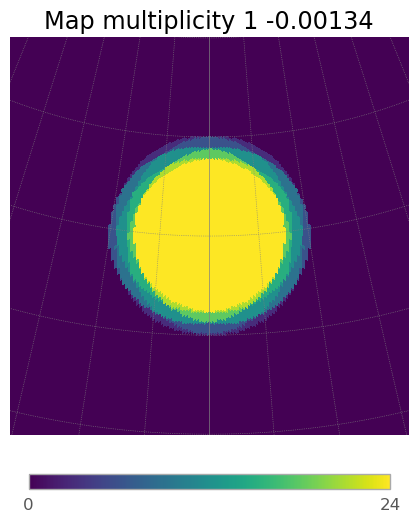

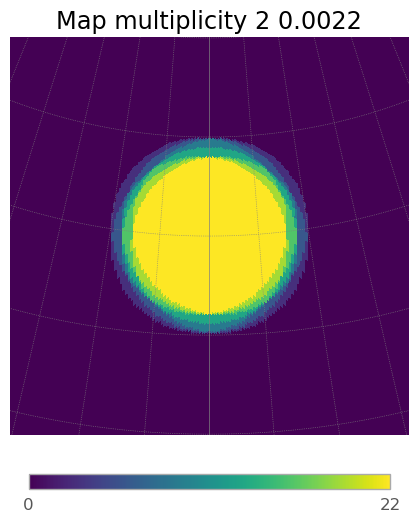

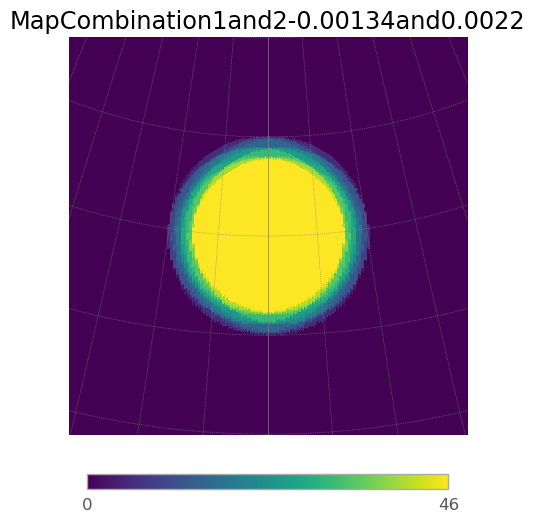

the barycenter for the calculations[-0.73913043  0.         29.65217391]
the barycenter for the calculations of the second divergence[-0.73913043  0.         29.65217391]


6it [00:01,  5.99it/s]
7it [00:01,  6.16it/s]
6it [00:01,  5.68it/s]


10.626908286878876


7it [00:01,  6.08it/s]


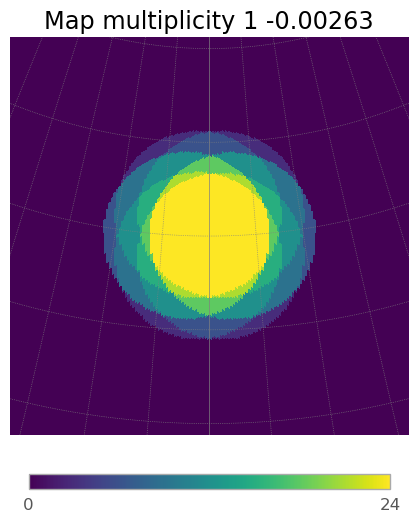

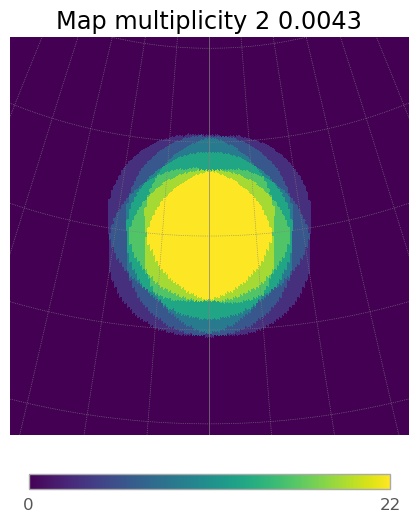

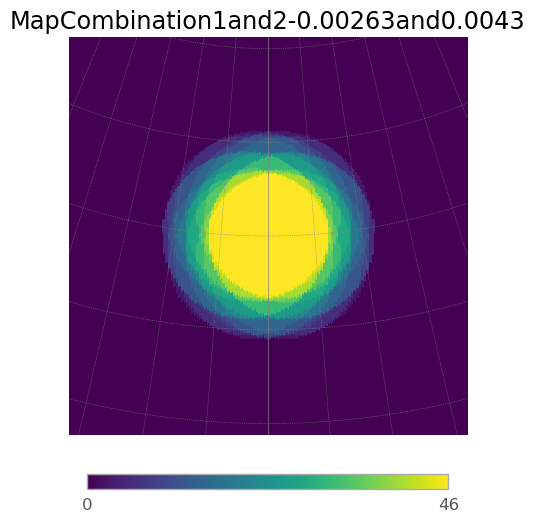

the barycenter for the calculations[-0.73913043  0.         29.65217391]
the barycenter for the calculations of the second divergence[-0.73913043  0.         29.65217391]


6it [00:01,  4.93it/s]
7it [00:01,  6.04it/s]
6it [00:01,  5.85it/s]


11.663488057389046


7it [00:01,  6.13it/s]


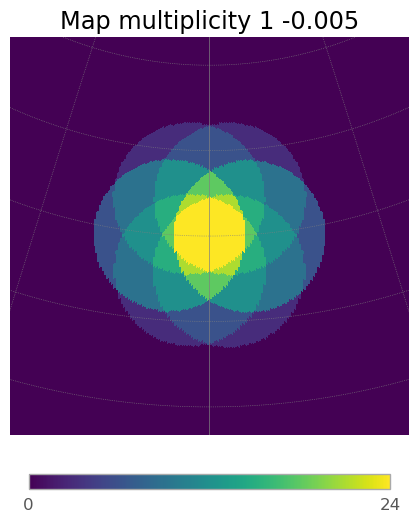

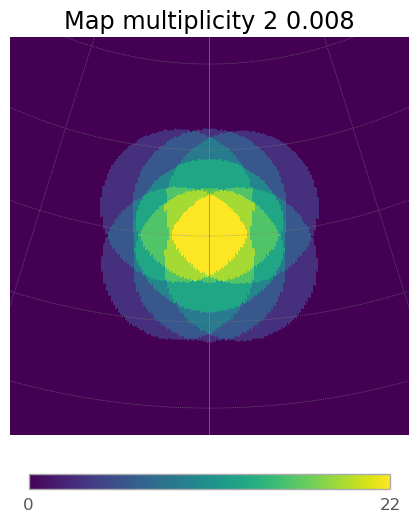

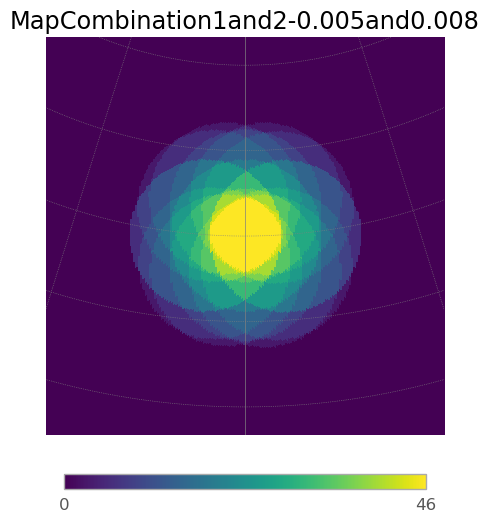

the barycenter for the calculations[-0.73913043  0.         29.65217391]
the barycenter for the calculations of the second divergence[-0.73913043  0.         29.65217391]


6it [00:01,  6.00it/s]
7it [00:01,  6.30it/s]
6it [00:01,  5.84it/s]


12.610966987872825


7it [00:01,  6.03it/s]


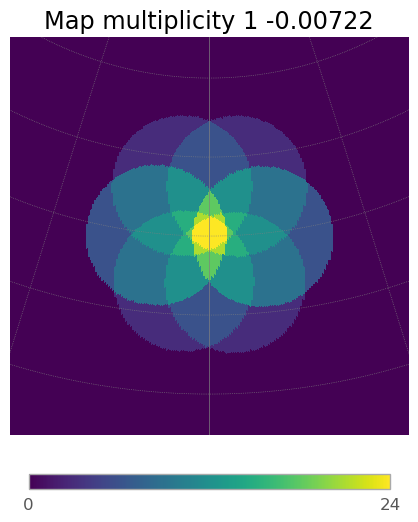

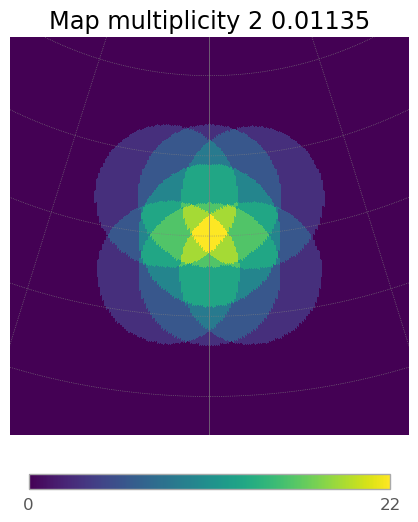

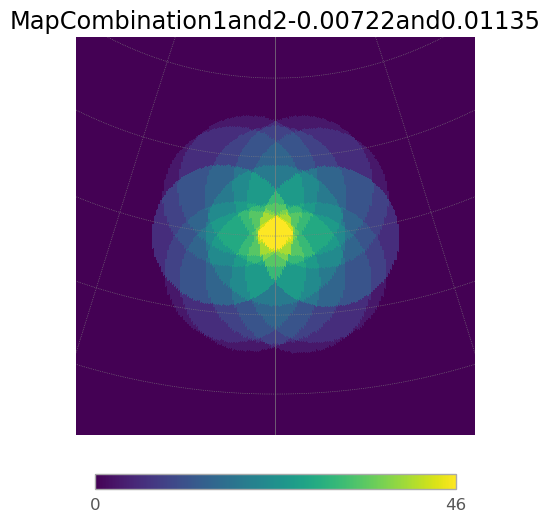

In [157]:
for i in range(4):
    array_conv.divergent_pointing_2_div(complete_array=full_array,tel_group_2=array_div, div1=convergence_list[i], div2=divergence_list[i], az=0, alt=60)
    array_conv.multiplicity_plot_2_div(array_div, subarray_mult_1=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)


In [ ]:
# To do the hFoV

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6)) 
# Plot Full Array
# Full Array with m_cut = 3
#l1=axes[0].plot(chosen_divergences, FoV_full_array, label='FoV', marker='o', color='darkgreen')
#ax2 = axes[0].twinx()
#l2=ax2.plot(chosen_divergences, multiplicity_full_array, label='Multiplicities',marker='*', color='limegreen')
#axes[0].set_title('Full Array m_cut 3')
#axes[0].set_xlabel('Divergence')
#axes[0].set_ylabel('Field of view (m > 3) [deg$^2$]')
#ax2.set_ylabel('Multiplicities (m>3)')
#axeslegend = l1+l2
#axes[0].legend(axeslegend, [l.get_label() for l in axeslegend])



#Plot the ones for subarray 1
l1=axes[1].plot(divergence_list,hFoV_combine, label='FoV',marker='o', color='darkgreen')
ax5=axes[1].twinx()
l2=ax5.plot(divergence_list, m_ave_combine, label='Multiplicity', marker='*', color='limegreen')
axes[1].set_title('Configurations Combined')
axes[1].set_xlabel('Divergence')
axes[1].set_ylabel('Field of view [deg$^2$]')
ax5.set_ylabel('Multiplicities')
axeslegend = l1+l2
axes[1].legend(axeslegend, [l.get_label() for l in axeslegend])
#Plot the ones for subarray 2

# Adjust layout
plt.tight_layout()
# Subarray 4
# Adjust layout
plt.show()